<a href="https://colab.research.google.com/github/alejandromunizsiques/WorkPlace/blob/master/Prueba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado


Requirements:
Your task is to create a detailed presentation to hotel executives that describes trends in hotel data to make data-driven business decisions. They are particularly interested in learning about the factors that might increase their number of bookings and reduce their number of cancellations.

The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

Address the missing values in this dataset. Deal with these appropriately. . Include a brief description of the method you used to deal with missing values along with a justification for that method.
Ensure all columns match the data types listed in the data dictionary.
The next step is to complete an analysis based on the data using Python. This should include visualizations and an analysis of trends or any other insights you can gain from the data. You should include at least 3 useful and clear visualizations. Under each visualization, include a brief description of the insights gained from that data visualization.

The final step is to create a presentation that you could give to hotel executives. This should be a slidedeck (feel free to use any tool you would like - PowerPoint, Google Slides, etc.) with visualizations, insights, and recommendations to the executives.

Some questions you can explore include (but are not limited to):

What factors are associated with higher bookings?
What factors are associated with lower cancellations?
What times of the year are associated with more cancellations?
What are the most popular times of year for guests to book?
When are bookings highest?
What is the optimal length of stay in order for guests to get the best daily rate?

# Carga de librerias



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carga del dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Pruebas Semana 1/hotel_bookings.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# info del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Diccionario del dataset

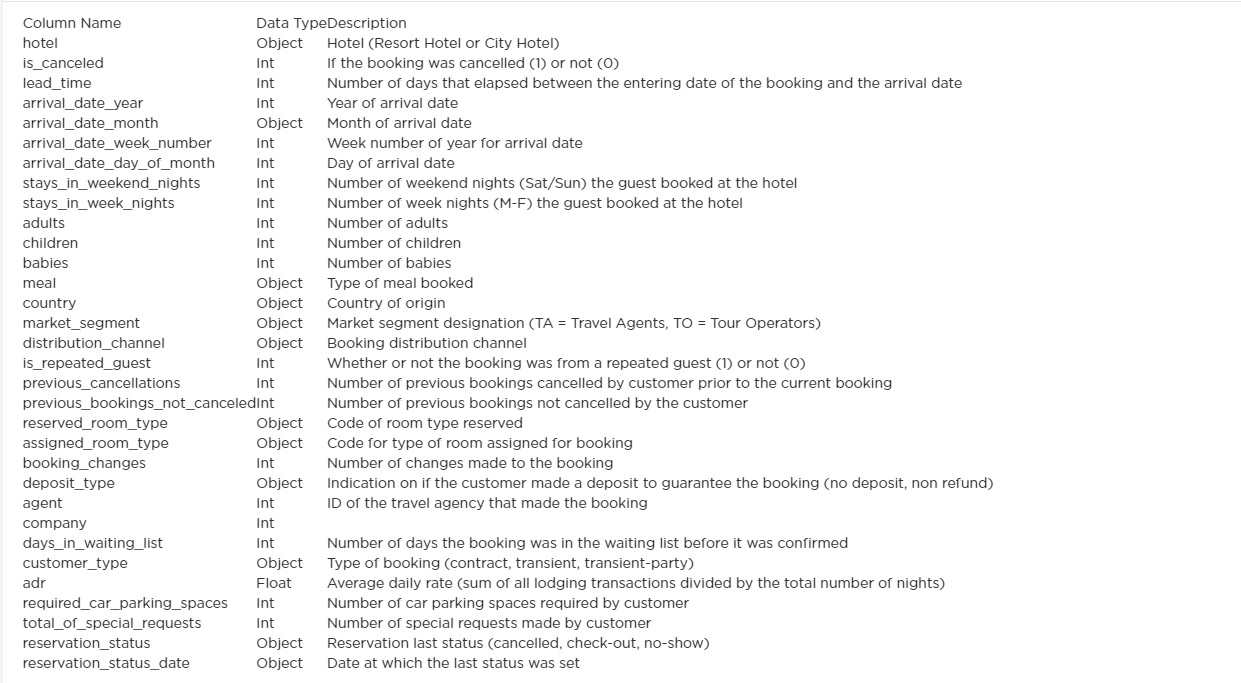

# Tabulacion del dataet (First glance)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Descripcion estadistica basica

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data cleaning y comprobacion con diccionario


In [ ]:
hotel_2 = df
hotel_2 = hotel_2.drop(columns=["company"],axis = 0) # se decide eliminar la coilumna puesto que no es mencionada en el diccionario de datos 
missing_data_children = hotel_2["children"].isna()
hotel_2[missing_data_children] # identificando que el tipo de cliente era de tipo "Transient-Party" y que ademas de tener un status de cancelacion, por lo tanto se asume que el valor faltante de niños es 0
hotel_2["children"] = hotel_2["children"].fillna(hotel_2["children"].mean())
hotel_2["children"] = hotel_2["children"].astype(int) #codigo sacado del siguiente url: https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
missing_data_country = hotel_2["country"].isna()
hotel_2[missing_data_country] # al no encontrarse ninguna razon por la cual falta, ni que esta tenga alguna relacion con otra variable, esta es clasificada como MCAR y se decide eliminar
hotel_2 = hotel_2.drop(columns=["country"],axis=0)
hotel_2 = hotel_2.drop(columns=["agent"],axis=0) # se considera que la columna "agent" no tiene ningun valor para nuestro analisis, por lo tanto se elimina
hotel_2["is_canceled"] = hotel_2["is_canceled"].astype('object')
hotel_2["is_canceled"] = hotel_2["is_canceled"].replace([1,0],["Cancelado","NO Cancelado"])
filtro_prueba = hotel_2["children"] > 0
hotel_2[filtro_prueba]






,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13,Resort Hotel,NO Cancelado,18,2015,July,27,1,0,4,2,1,0,HB,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05
45,Resort Hotel,Cancelado,47,2015,July,27,2,2,5,2,2,0,BB,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,0,Transient,153.00,0,0,Canceled,2015-06-02
55,Resort Hotel,NO Cancelado,1,2015,July,#27,2,0,1,2,2,0,BB,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.00,1,2,Check-Out,2015-07-03
65,Resort Hotel,NO Cancelado,10,2015,July,27,3,0,2,2,2,0,BB,Online TA,TA/TO,0,0,0,G,H,0,No Deposit,0,Transient,153.00,1,0,Check-Out,2015-07-05
87,Resort Hotel,Cancelado,79,2015,July,27,3,6,15,2,1,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,108.73,0,2,Canceled,2015-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,NO Cancelado,0,2017,August,35,29,0,3,2,1,0,BB,Online TA,TA/TO,0,0,0,A,D,1,No Deposit,0,Transient,135.00,0,2,Check-Out,2017-09-01
119287,City Hotel,NO Cancelado,167,2017,August,35,27,2,4,2,1,0,BB,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,0,Transient,177.75,0,0,Check-Out,2017-09-02
119293,City Hotel,NO Cancelado,243,2017,August,35,30,0,3,2,2,0,BB,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,0,Transient,189.00,0,3,Check-Out,2017-09-02
119318,City Hotel,NO Cancelado,160,2017,August,35,29,0,5,2,1,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,153.90,0,0,Check-Out,2017-09-03


# Analisis del dataset

## What factors are associated with higher bookings?

## Grafico de analisis Cancelado/ No cancelado Vs Tipo de cliente

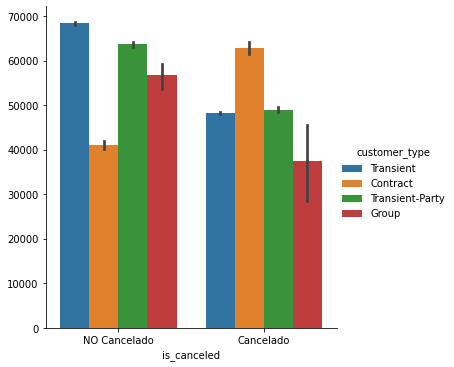

In [ ]:


sns.catplot(x="is_canceled", y=hotel_2.index, hue="customer_type", kind="bar", data=hotel_2) # sacado de el url https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots
plt.savefig('tipoC.png', dpi = 300)

Grafico de analisis Niños/ Cancelaciones

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

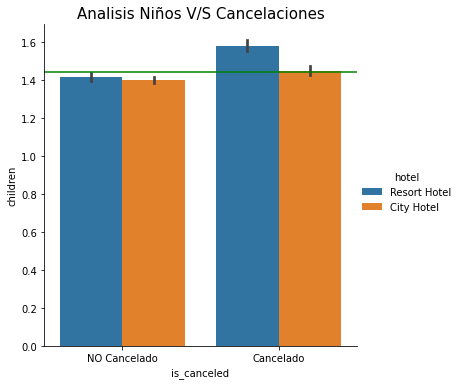

In [ ]:
filtro_con_niños = hotel_2["children"]>0
hotel_3 = hotel_2[filtro_con_niños]
sns.catplot(x="is_canceled", y="children", hue="hotel",kind="bar", data=hotel_3,)
plt.axhline(hotel_3["children"].mean(),color = "green", label = "Promedio") 
plt.title('Analisis Niños V/S Cancelaciones', fontsize = 15)

plt.savefig('2.png', dpi = 300)
files.download('2.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

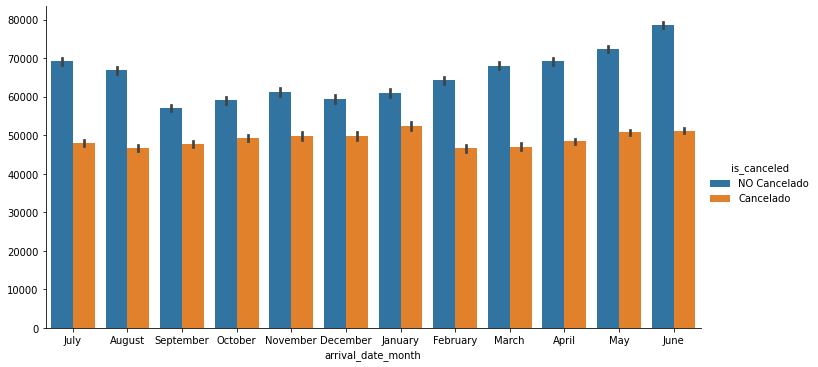

In [ ]:
filtro_cancelado = hotel_2["is_canceled"] == "Cancelado"
filtro_NO_Cancelado = hotel_2["is_canceled"] == "NO Cancelado"
hotel_4 = hotel_2[filtro_cancelado]
hotel_5 = hotel_2[filtro_NO_Cancelado]

sns.catplot(x ="arrival_date_month",y= hotel_2.index,hue="is_canceled", kind="bar", data=hotel_2,aspect=2 )
plt.savefig('3.png', dpi = 300)
from google.colab import files
files.download('3.png')


In [ ]:
from google.colab import files
files.download("tipoC.png")

files.download("bookingxmoth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: ignored